# Анализ сервиса аренды самокатов GoFast

У нас есть данные о некоторых пользователях сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках. Проанализируем эти данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки  
абонентская плата отсутствует;  
стоимость одной минуты поездки — 8 рублей;  
стоимость старта (начала поездки) — 50 рублей;  

с подпиской Ultra  
абонентская плата — 199 рублей в месяц;  
стоимость одной минуты поездки — 6 рублей;  
стоимость старта — бесплатно.  

**Описание данных** 

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv:  
- user_id	уникальный идентификатор пользователя  
- name	имя пользователя  
- age	возраст  
- city	город  
- subscription_type	тип подписки (free, ultra)

Поездки — rides_go.csv:
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

Подписки — subscriptions_go.csv:
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

**План работы**

- загрузим и изучим имеющиеся данные;
- проведем предобработку данных;
- опишем и визуализируем общую информацию о поездках;
- изучим и визуализируем данные по категориям пользователей с подпиской и без;
- посчитаем выручку по месяцам для пользователй с подпиской и без;
- проверим несколько гипотез для принятия решения о развитии бизнеса.


### Шаг 1. Загрузка данных

#### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

In [1]:
import pandas as pd

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

#### Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [3]:
display(users_go)
users_go.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице users_go содержатся:
- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

Количество заполненных строк в столбцах совпадает, значит пропуски отсутствуют.

In [4]:
display(rides_go)
rides_go.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице rides_go содержатся:
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

Пропуски в данных также отсутствуют.

У столбца date тип данных object. Изменим его позднее на тип данных datetime.

In [5]:
display(subscriptions_go)
subscriptions_go.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В таблице subscriptions_go содержатся:
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

В таблице всего 2 строки. Пропуски в данных отсутствуют.

### Шаг 2. Предобработка данных

#### Приведем столбец date к типу даты pandas.

In [6]:
rides_go['date'] = pd.to_datetime(rides_go['date'])
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Создадим новый столбец с номером месяца на основе столбца date.

Сначала проверим данные за сколько лет мы имеем. Если данные представлены за несколько лет, то отдельная цифра месяца не будет корректно отображать в каком периоде была совершена поездка.

In [7]:
print(rides_go['date'].dt.year.unique())

[2021]


Данные предоставлены только за один год, значит можно выделять отдельно месяц для дальнейшей работы с данными.

In [8]:
rides_go['month'] = rides_go['date'].dt.month
display(rides_go)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


#### Проверим наличие пропущенных значений и дубликатов в датафреймах. 

При загрузке и изучении данных мы выявили, что пропуски отсутствуют. Поэтому перейдем сразу к проверке на наличие дубликатов.

In [9]:
print(users_go.duplicated().sum())
print(rides_go.duplicated().sum())
print(subscriptions_go.duplicated().sum())

31
0
0


В таблице users_go найден 31 явный дубликат. Удалим эти строки.

In [10]:
users_go = users_go.drop_duplicates()

В таблице subscriptions_go дубликатов однозначно нет. В таблице rides_go все данные числовые и загружаются автоматически, а не вводятся вручную, в связи с этим неявные дубликаты, вероятно, также отсутствуют.

Проверим дополнительно столбцы name и city таблицы users_go на наличие дубликатов.

In [11]:
names = users_go['name'].unique()
names.sort()
names

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [12]:
cities = users_go['city'].unique()
cities.sort()
cities

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

Больше дубликатов не выявлено.

### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

In [13]:
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib для визуализаций

#### частота встречаемости городов;

In [67]:
#выделим города в отдельную переменную
users_by_city = users_go['city'].value_counts()
users_by_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [68]:
#посчитаем процент пользователей в каждом городе от общего числа пользователей
users_by_city['percent'] = round(users_go['city'].value_counts() / 
                                 users_by_city.sum(), 2) * 100
users_by_city['percent']

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

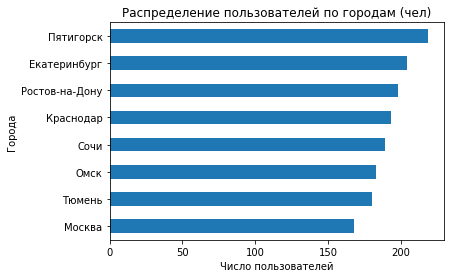

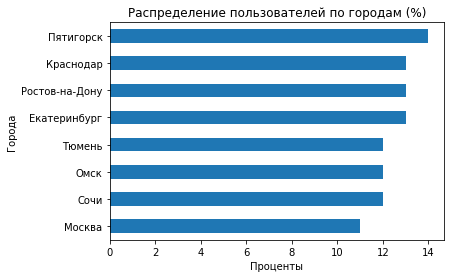

In [78]:
users_go['city'].value_counts().sort_values().plot(
    kind = 'barh',
    title = 'Распределение пользователей по городам (чел)')
plt.xlabel('Число пользователей')
plt.ylabel('Города')
plt.show()

users_by_city['percent'].sort_values().plot(
    kind = 'barh',
    title = 'Распределение пользователей по городам (%)')
plt.xlabel('Проценты')
plt.ylabel('Города')
plt.show()

Видим, что во всех представленных городах самокатами пользуется примерно одинаковое количество людей. Разброс относительно небольшой 11-14% от общего количества пользователей. Но на удивление в Москве (самом крупном городе) меньше всего пользователей. А больше всего пользователей в Пятигорске, довольно маленьком городе. Возможно, это связано с тем, что в более крупных городах представлено больше сервисов самокатов, поэтому на каждый сервис приходится меньше пользователей. А в маленьких городах происходит наоборот: сервисов меньше и на каждый сервис больше пользователей.

#### соотношение пользователей с подпиской и без подписки;

In [16]:
users_go['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

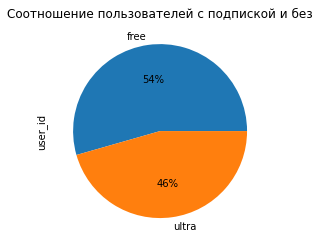

In [82]:
users_go.groupby(['subscription_type']).count().plot(kind='pie', y='user_id', legend=False, autopct='%1.0f%%', title = 'Соотношение пользователей с подпиской и без')

plt.show()

Видим, что сервисом без подписки пользуются немного чаще, чем с подпиской. Это в целом логично, так как многие пользуются самокатами не на регулярной основе, и подписка им не актуальна. При этом, на мой взгляд, процент пользователей с подпиской довольно высок, почти половина всех пользователей.

#### возраст пользователей;

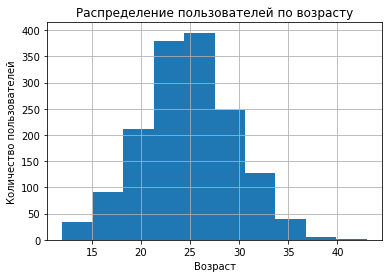

In [84]:
users_go['age'].hist()
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Чаще всего сервисом пользуются молодые люди в возрасте от 18 до 33 лет, при этом наибольшее количество пользователей в возрасте от 22 до 27 лет. 

До 18 лет пользователей немного. До совершеннолетия могут не использовать сервис по запрету родителей или использовать аккаунты родителей.

После 30 лет количество пользователей резко снижается, что может быть связано как с возникающими с возрастом ограничениями по здоровью, так и с тем, что данный вид транспорта может не соответствовать по статусу/должности.

#### расстояние, которое пользователь преодолел за одну поездку;

Минимальное расстояние одной поездки: 0.86 м
Максимальное расстояние одной поездки: 7211.01 м
Среднее расстояние одной поездки: 3070.66 м


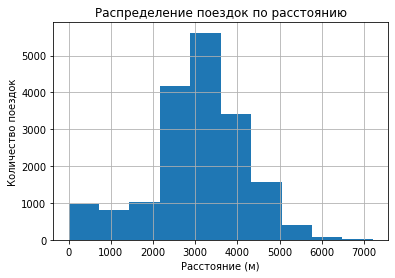

In [86]:
print('Минимальное расстояние одной поездки:', round(rides_go['distance'].min(), 2), 'м')
print('Максимальное расстояние одной поездки:', round(rides_go['distance'].max(), 2), 'м')
print('Среднее расстояние одной поездки:', round(rides_go['distance'].mean(), 2), 'м')
rides_go['distance'].hist()
plt.title('Распределение поездок по расстоянию')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

In [20]:
rides_go.sort_values(by='distance').head(15)

,user_id,distance,duration,date,month
11555,1069,0.855683,10.001902,2021-01-31,1
9541,925,2.570787,3.011018,2021-10-19,10
13690,1223,4.329506,4.008958,2021-05-22,5
8658,861,6.784447,6.015656,2021-07-21,7
7841,796,7.097072,10.026614,2021-11-26,11
8906,880,11.283615,2.035632,2021-03-28,3
8324,835,12.233115,4.034952,2021-09-19,9
13940,1240,15.000606,10.045002,2021-08-20,8
15626,1364,15.366168,6.057623,2021-08-22,8
11862,1091,15.630873,13.044660,2021-03-29,3


Как мы видим, в среднем за одну поездку на самокате пользователи преодолевают расстояние в 3 км. В основном самокаты используют для поездок на расстояния от 2 до 4 км. Но есть и совсем короткие поездки до 10 метров, вероятно, пробные, и длинные поездки до 7 км.

#### продолжительность поездок.

Минимальная продолжительность одной поездки: 0.5 мин
Максимальная продолжительность одной поездки: 40.82 мин
Средняя продолжительность одной поездки: 17.81 мин


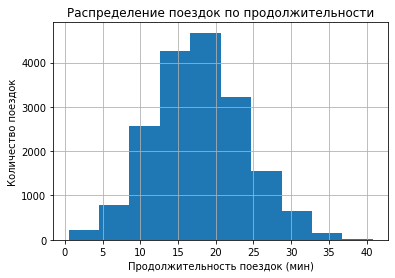

In [89]:
print('Минимальная продолжительность одной поездки:', round(rides_go['duration'].min(), 2), 'мин')
print('Максимальная продолжительность одной поездки:', round(rides_go['duration'].max(), 2), 'мин')
print('Средняя продолжительность одной поездки:', round(rides_go['duration'].mean(), 2), 'мин')
rides_go['duration'].hist()
plt.title('Распределение поездок по продолжительности')
plt.xlabel('Продолжительность поездок (мин)')
plt.ylabel('Количество поездок')
plt.show()

Средняя продолжительность одной поездки составляет примерно 18 минут. В основном самокат используют для поездок на 8-25 минут. Довольно много поездок до 8 минут, которые, вероятно, являются пробными. Количество поездок длительностью более 25 минут резко снижается.

### Шаг 4. Объединение данных

#### Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [22]:
total_go = users_go.merge(rides_go).merge(subscriptions_go)
display(total_go)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Проверим корректность объединения таблиц. 

In [92]:
total_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 2.3+ MB


Количество строк в объединенной таблице соответствует количеству строк в таблице rides_go, пропуски в строках отсутствуют. Значит, объединение таблиц проведено корректно, данные не потеряны.

#### Создим два новых датафрейма из объединенного датафрейма:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [23]:
#subscription free
free_go = total_go.loc[total_go['subscription_type'] == 'free']
display(free_go)

#subscription ultra
ultra_go = total_go.loc[total_go['subscription_type'] == 'ultra']
display(ultra_go)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


#### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Расстояния одной поездки Без подписки
Минимальное расстояние: 0.86 м
Максимальное расстояние: 7211.01 м
Среднее расстояние: 3045.5 м

Расстояния одной поездки С подпиской
Минимальное расстояние: 244.21 м
Максимальное расстояние: 5699.77 м
Среднее расстояние: 3115.45 м


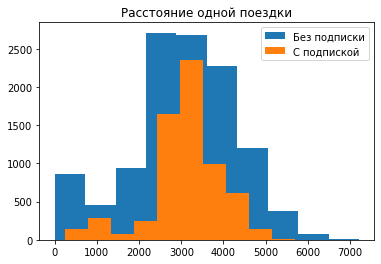

In [24]:
#subscription free
print('Расстояния одной поездки Без подписки')
print('Минимальное расстояние:', round(free_go['distance'].min(), 2), 'м')
print('Максимальное расстояние:', round(free_go['distance'].max(), 2), 'м')
print('Среднее расстояние:', round(free_go['distance'].mean(), 2), 'м')

print()

#subscription ultra
print('Расстояния одной поездки С подпиской')
print('Минимальное расстояние:', round(ultra_go['distance'].min(), 2), 'м')
print('Максимальное расстояние:', round(ultra_go['distance'].max(), 2), 'м')
print('Среднее расстояние:', round(ultra_go['distance'].mean(), 2), 'м')

plt.hist(free_go['distance'], label='Без подписки')
plt.hist(ultra_go['distance'], label='С подпиской')
plt.legend(loc='upper right')
plt.title('Расстояние одной поездки')
plt.show()

Продолжительность одной поездки Без подписки
Минимальная продолжительность: 0.5 мин
Максимальная продолжительность: 34.95 мин
Средняя продолжительность: 17.39 мин

Продолжительность одной поездки С подпиской
Минимальная продолжительность: 3.76 мин
Максимальная продолжительность: 40.82 мин
Средняя продолжительность: 18.54 мин


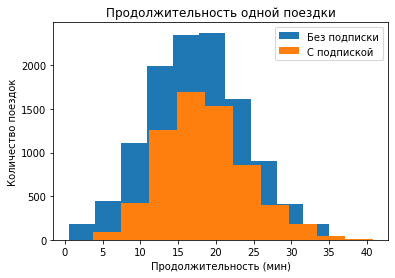

In [94]:
#subscription free
print('Продолжительность одной поездки Без подписки')
print('Минимальная продолжительность:', round(free_go['duration'].min(), 2), 'мин')
print('Максимальная продолжительность:', round(free_go['duration'].max(), 2), 'мин')
print('Средняя продолжительность:', round(free_go['duration'].mean(), 2), 'мин')

print()

#subscription ultra
print('Продолжительность одной поездки С подпиской')
print('Минимальная продолжительность:', round(ultra_go['duration'].min(), 2), 'мин')
print('Максимальная продолжительность:', round(ultra_go['duration'].max(), 2), 'мин')
print('Средняя продолжительность:', round(ultra_go['duration'].mean(), 2), 'мин')

plt.hist(free_go['duration'], label='Без подписки')
plt.hist(ultra_go['duration'], label='С подпиской')
plt.legend(loc='upper right')
plt.title('Продолжительность одной поездки')
plt.xlabel('Продолжительность (мин)')
plt.ylabel('Количество поездок')
plt.show()

В целом пользователи с подпиской и без ведут себя примерно одинаково: 

среднее расстояние одной поездки составляет примерно 3 км. Но у пользователей с подпиской наиболее часто встречаются поездки 3-3,5 км, а у пользователей без подписки 2,1-3 км.  У пользователей с подпиской меньше очень коротких поездок, так как пробные поездки им уже не нужны. Поездки свыше 4 км распределены в обеих группах примерно одинаково, но самые длинные поездки осуществлялись без подписки;

средняя продолжительность одной поездки составляет примерно 18 мин. Но у пользователей с подпиской наиболее часто встречаются поездки 15-18 мин, а у пользователей без подписки 18-21 мин. У пользователей с подпиской также меньше очень коротких поездок, так как пробные поездки им уже не нужны. Поездки дольше 25 минут распределены в обеих группах примерно одинаково, но более продолжительные поездки осуществлялись с подпиской.

### Шаг 5. Подсчёт выручки

#### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости будем округлять до следующего целого числа.

In [26]:
#округлим продолжительность каждой поездки с помощью метода «потолок» библиотеки numpy — np.ceil()
import numpy as np

total_go['duration'] = np.ceil(total_go['duration']) 

In [27]:
total_go_agg = total_go.groupby(['user_id', 'month']).agg({'distance':'sum',
                                                           'duration':['count', 'sum'],
                                                           'start_ride_price':'first',
                                                           'minute_price':'first',
                                                           'subscription_fee':'first'})
total_go_agg.columns = ['sum_distance', 'rides_count', 'sum_duration', 'start_ride_price', 'minute_price', 'subscription_fee']
display(total_go_agg.head(12))

sum_distance  rides_count  sum_duration  start_ride_price  \
user_id month                                                              
1       1       7027.511294            2          42.0                 0   
        4        754.159807            1           7.0                 0   
        8       6723.470560            2          46.0                 0   
        10      5809.911100            2          32.0                 0   
        11      7003.499363            3          56.0                 0   
        12      6751.629942            2          28.0                 0   
2       3      10187.723006            3          63.0                 0   
        4       6164.381824            2          40.0                 0   
        6       3255.338202            1          14.0                 0   
        7       6780.722964            2          48.0                 0   
        8        923.007439            1           7.0                 0   
        10      2824.636598            1          19.0                 0   

               minute_price  subscription_fee  
user_id month                                  
1       1                 6               199  
        4                 6               199  
        8                 6               199  
        10                6               199  
        11                6               199  
        12                6               199  
2       3                 6               199  
        4                 6               199  
        6                 6               199  
        7                 6               199  
        8                 6               199  
        10                6               199

#### Добавим в новый датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь. 

In [28]:
#Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок 
#+ стоимость одной минуты поездки 
#× общая продолжительность всех поездок в минутах + стоимость подписки.
total_go_agg['month_revenue'] = (total_go_agg['start_ride_price'] * total_go_agg['rides_count'] 
                                 + total_go_agg['minute_price'] * total_go_agg['sum_duration'] 
                                 + total_go_agg['subscription_fee']
                                )
display(total_go_agg)

sum_distance  rides_count  sum_duration  start_ride_price  \
user_id month                                                              
1       1       7027.511294            2          42.0                 0   
        4        754.159807            1           7.0                 0   
        8       6723.470560            2          46.0                 0   
        10      5809.911100            2          32.0                 0   
        11      7003.499363            3          56.0                 0   
...                     ...          ...           ...               ...   
1534    6       3409.468534            2          26.0                50   
        8       7622.453034            2          48.0                50   
        9       4928.173852            1          23.0                50   
        11     13350.015305            4          78.0                50   
        12      2371.711192            1          16.0                50   

               minute_price  subscription_fee  month_revenue  
user_id month                                                 
1       1                 6               199          451.0  
        4                 6               199          241.0  
        8                 6               199          475.0  
        10                6               199          391.0  
        11                6               199          535.0  
...                     ...               ...            ...  
1534    6                 8                 0          308.0  
        8                 8                 0          484.0  
        9                 8                 0          234.0  
        11                8                 0          824.0  
        12                8                 0          178.0  

[11331 rows x 7 columns]

### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

In [99]:
#импортируем scipy для проверки гипотез
from scipy import stats as st

#импортируем warnings для исключения предупреждений
import warnings
warnings.filterwarnings("ignore")

#### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

Выдвигаем гипотезы:

**Гипотеза Н0:** Средняя продолжительность поездок с подпиской и без подписки равна.  
**Гипотеза Н1:** Средняя продолжительность поездок с подпиской больше, чем без подписки.

In [96]:
results_1 = st.ttest_ind(ultra_go['duration'], free_go['duration'], alternative='greater')
print(results_1.pvalue)
if results_1.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


В ходе проверки мы отвергли нулевую гипотезу. Можно полагать, что средняя продожительность поездок с подпиской больше, чем без подписки.

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Выдвигаем гипотезы:

**Гипотеза Н0:** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает (меньше или равно) 3130 метров.  
**Гипотеза Н1:** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [97]:
results_2 = st.ttest_1samp(ultra_go['distance'], 3130, alternative='greater')
print(results_2.pvalue)
if results_2.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


В ходе проверки нулевую гипотезу отвергнуть не удалось. Можно полагать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

#### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Выдвигаем гипотезы:

**Гипотеза Н0:** Ежемесячная выручка от пользователей с подпиской по месяцам равна ежемесячной выручке от пользователей без подписки.  
**Гипотеза Н1:** Ежемесячная выручка от пользователей с подпиской по месяцам больше ежемесячной выручке от пользователей без подписки.

In [98]:
results_3 = st.ttest_ind(total_go_agg.loc[total_go_agg['subscription_fee'] > 0, 'subscription_fee'], 
                       total_go_agg.loc[total_go_agg['subscription_fee'] == 0, 'subscription_fee'],
                       alternative = 'greater')
print(results_3.pvalue)

if results_3.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.0
Отвергаем нулевую гипотезу


В ходе проверки мы отвергли нулевую гипотезу. Можно полагать, что ежемесячная выручка от пользователей с подпиской по месяцам равна ежемесячной выручке от пользователей без подписки.

#### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().

### Общий вывод

Мы изучили данные о использовании сервиса аренды самокатов GoFast и выявили, что:
- во всех городах, в которых представлен сервис, примерно одинковое количество пользователей. Меньше всего (168) пользователей в Москве, больше всего (219) - в Пятигорске;
- пользователи с подпиской и без распределены практически пополам (54% без подписки и 46% с подпиской);
- в основном сервисом пользуются люди в возрасте от 22 до 27 лет;
- среднее расстояние одной поездки составляет 3 км и средняя продолжительность одной поездки составляет 18 минут.

Также мы сравнили данные по пользователям с подпиской и без и проверили несколько гипотез. 
По полученной информации можно сделать вывод, что пользователи с подпиской и без подписки используют сервис примерно одинаково. Поездки пользователей с подпиской несколько дольше поездок пользователей без подписки, что вероятно связано с меньшей стоимостью одной минуты и отсутствием стоимости начала поездки. То есть пользователи с подпиской просто не спешат. Но и те, и другие приносят примерно одинаковую выручку в месяц. Поэтому увеличение количества пользователей с подпиской не поможет бизнесу значительно вырасти. 

Исходя из полученных данных, можно рекомендовать продакт-менеджерам сервиса для расширения бизнеса акцентировать внимание не на пользователях с подпиской, а в целом на увеличении количества пользователей. При этом для удержания клиентов может быть выгодно увеличивать процент пользователей с подпиской. При проведении акций можно будет указывать, что траты не увеличатся, но с подпиской сервисом будет пользоваться удобней.